In [1]:
import pandas as pd
import pyreadstat as pyreadstat

#dataframe, meta = pyreadstat.read_sav(r"C:\Users\Alexkeks\Downloads\RLMS_HH_1994_2022_v4\RLMS_HH_1994_2022_v4.sav")
dataframe, meta = pyreadstat.read_sav(r"C:\Users\Alexkeks\Downloads\RLMS_IND_1994_2022_2023_09_01_1_v3_rus\RLMS_IND_1994_2022_2023_09_01_1_v3_rus.sav")

In [2]:
!pip install pyreadstat

     ---------------------------------------- 2.4/2.4 MB 8.1 MB/s eta 0:00:00


In [47]:
open(r"C:\Users\Alexkeks\Downloads\RLMS_HH_1994_2022_v4\questions", "w").write('\n'.join(meta.column_labels))



175277

In [21]:
meta.variable_value_labels['J72.21']

{1.0: 'ВСЕ ВРЕМЯ', 2.0: 'НЕ ВСЕ ВРЕМЯ'}

In [34]:
col = 'J72.21'
print(meta.column_names_to_labels[col])
d=dataframe[dataframe[col].notnull()][col].value_counts()

[(meta.variable_value_labels['J72.21'].get(k),v) for k,v in d.items()]

Вы работали по полученной или близкой к ней специальности все время или не все время?


[('ВСЕ ВРЕМЯ', 3310), ('НЕ ВСЕ ВРЕМЯ', 2774)]

In [14]:
[(col, labels) for col, labels in meta.column_names_to_labels.items() if 'спец' in labels]

[('J21.4',
  'Собираетесь ли Вы работать на вредном производстве после того, как выработаете специальный стаж, дающий Вам право на досрочное назначение трудовой пенсии?'),
 ('J721DAC08',
  'Код профессии по ISCO2008 первой специальности профессиональных курсов'),
 ('J721DBC08',
  'Код профессии по ISCO2008 второй специальности профессиональных курсов'),
 ('J721DCC08',
  'Код профессии по ISCO2008 третьей специальности профессиональных курсов'),
 ('J721DDC08',
  'Код профессии по ISCO2008 четвертой специальности профессиональных курсов'),
 ('J721DEC08',
  'Код профессии по ISCO2008 пятой специальности профессиональных курсов'),
 ('J722DAC08',
  'Код профессии по ISCO2008 первой специальности ПТУ, ФЗУ, ФЗО без среднего образования'),
 ('J722DBC08',
  'Код профессии по ISCO2008 второй специальности ПТУ, ФЗУ, ФЗО без среднего образования'),
 ('J723DAC08',
  'Код профессии по ISCO2008 первой специальности ПТУ со средним образованием, технического училища'),
 ('J723DBC08',
  'Код профессии п

In [70]:
dataframe=dataframe[dataframe['YEAR']==2008]

df=dataframe

df['J72.21']=df['J72.21'].map(meta.variable_value_labels['J72.21'])

df['H5']=df['H5'].map(meta.variable_value_labels['H5'])

df['J72.19A']=df['J72.19A'].map(meta.variable_value_labels['J72.19A'])

df['J72.20']=df['J72.20'].map(meta.variable_value_labels['J72.20'])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
col = 'J72.19A'


#print(df[df['H5']<100].groupby(['H5', col]).size().unstack().reset_index().plot.bar())



sns.countplot(data=df[df['AGE']<100], y=col, hue='H5')


"""for col, labels in meta.column_names_to_labels.items(): 
    if col.startswith('J72.'):
        print(meta.column_names_to_labels[col])
        print([(meta.variable_value_labels[col].get(label, label), cnt) for label, cnt in dataframe[dataframe[col].notnull()][col].value_counts().items()])"""
    


NameError: name 'df' is not defined

<Axes: xlabel='count', ylabel='J72.20'>

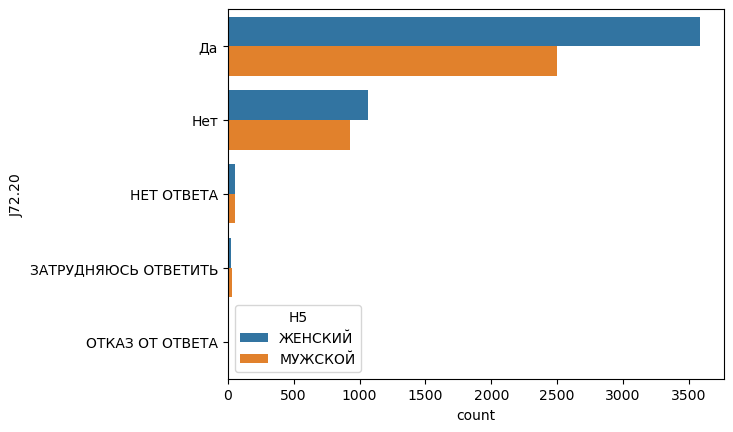

In [85]:
col='J72.20'

sns.countplot(data=df[df['AGE']<100], y=col, hue='H5')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

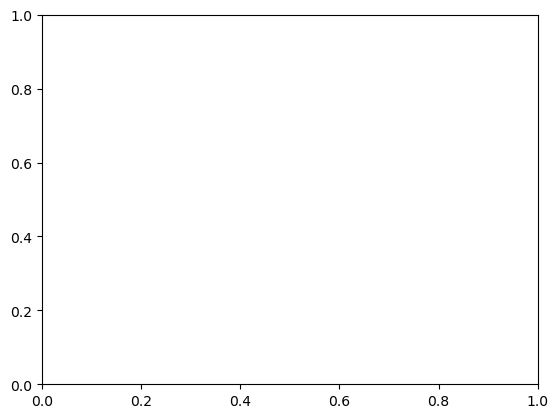

In [9]:
for k, v in meta.column_names_to_labels.items():
    if v=='Оцените в какой мере Ваша нынешняя работа требует того уровня образования, который Вы получили в учебном учреждении?':
        print(k)


J72.25


In [11]:
meta.variable_value_labels['J72.25']

{1.0: 'Ваш уровень образования выше, чем требуется',
 2.0: 'Ваш уровень образования примерно соответствует тому, что требуется',
 3.0: 'Ваш уровень образования ниже того, что требуется',
 99999997.0: 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
 99999998.0: 'ОТКАЗ ОТ ОТВЕТА',
 99999999.0: 'НЕТ ОТВЕТА'}

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_18988\746486132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


<Axes: xlabel='count', ylabel='J72.25'>

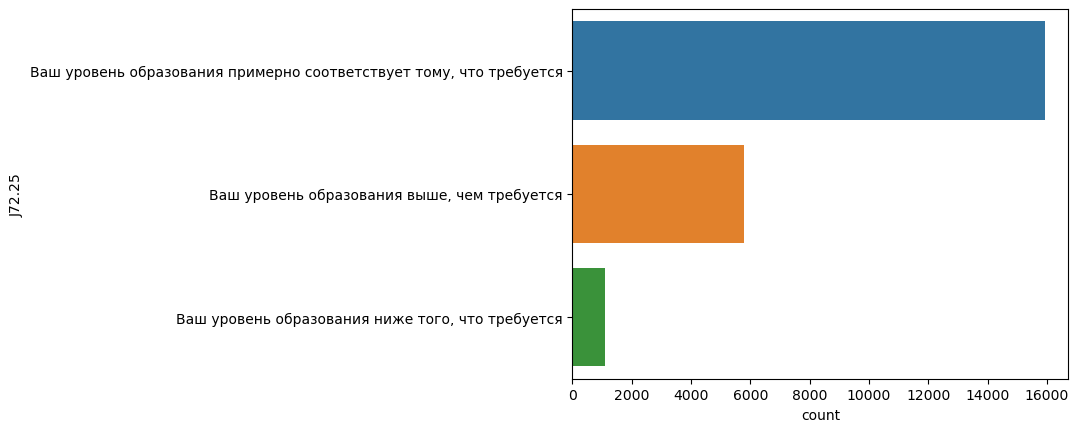

In [19]:
col = 'J72.25'
df_1 = dataframe[dataframe[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
sns.countplot(data=df_1[df_1['AGE']<100], y=col)


In [25]:
df_1 = df_1[df_1['J13.2'].notnull()]

,ID_W,IDIND,YEAR,REDID_I,ID_I,ID_H,ORIGSM,INWGT,REGION,PSU,...,S6,S7,S1.1_L,S1.2_L,S2_L,S3_L,S4_L,S5_L,S6_L,S7_L
145442,17.0,5.0,2008.0,182903.0,10100203.0,101002.0,1.0,1.046947,1.0,6.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145444,17.0,9.0,2008.0,183101.0,10100501.0,101005.0,1.0,0.792921,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145445,17.0,11291.0,2008.0,183201.0,10100701.0,101007.0,1.0,0.800482,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145446,17.0,30113.0,2008.0,183301.0,10100801.0,101008.0,1.0,1.046947,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145449,17.0,3.0,2008.0,183601.0,10105101.0,101051.0,0.0,0.000000,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194788,19.0,39835.0,2010.0,792301.0,161052401.0,1610524.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194789,19.0,39836.0,2010.0,792302.0,161052402.0,1610524.0,1.0,1.233285,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194795,19.0,39842.0,2010.0,792602.0,161053002.0,1610530.0,1.0,1.039878,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194796,19.0,39843.0,2010.0,792603.0,161053003.0,1610530.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


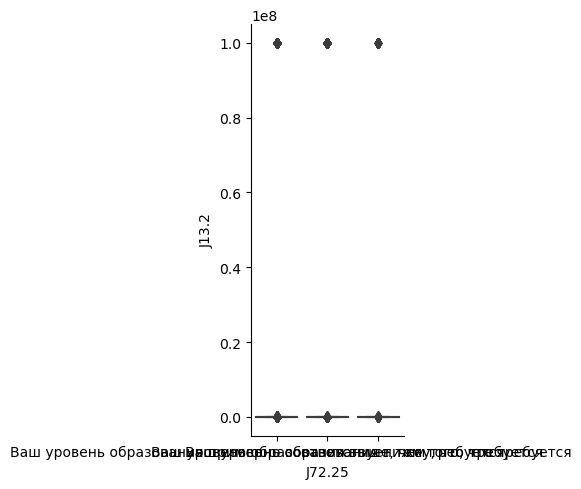

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_18988\1180726023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


{1.0: 'окончил 0 - 6 классов', 2.0: 'незаконченное среднее образование (7 - 8 кл)', 3.0: 'незаконченное среднее образование (7 - 8 кл) + что-то еще', 4.0: 'законченное среднее образование', 5.0: 'законченное среднее специальное образование', 6.0: 'законченное высшее образование и выше', 99999997.0: 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 99999998.0: 'ОТКАЗ ОТ ОТВЕТА', 99999999.0: 'НЕТ ОТВЕТА'}


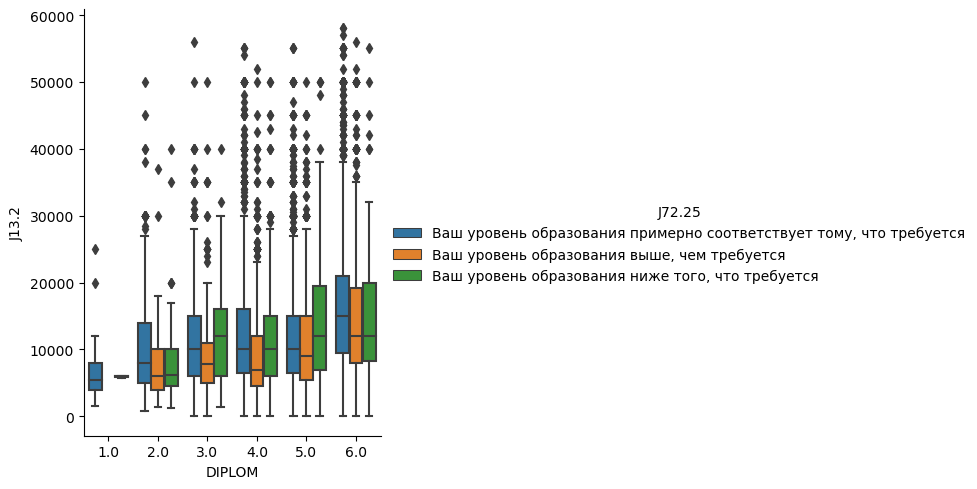

In [42]:
col = 'J72.25'
df_1 = dataframe[dataframe[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])

df_1=df_1[df_1['J13.2']<60000]
df_1=df_1[df_1['DIPLOM'] < 100]
col = 'DIPLOM'
#df_1[col]=df_1[col].map(meta.variable_value_labels[col])
print(meta.variable_value_labels[col])

sns.catplot(data=df_1, x='DIPLOM', y='J13.2',hue='J72.25', kind='box')

Смотрим на медиану
Вывод: Over образованные зарабвтывают меньше, чем с соответствующим уровнем образования и under образованные

In [36]:
df_1

,ID_W,IDIND,YEAR,REDID_I,ID_I,ID_H,ORIGSM,INWGT,REGION,PSU,...,S6,S7,S1.1_L,S1.2_L,S2_L,S3_L,S4_L,S5_L,S6_L,S7_L
145442,17.0,5.0,2008.0,182903.0,10100203.0,101002.0,1.0,1.046947,1.0,6.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145444,17.0,9.0,2008.0,183101.0,10100501.0,101005.0,1.0,0.792921,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145445,17.0,11291.0,2008.0,183201.0,10100701.0,101007.0,1.0,0.800482,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145446,17.0,30113.0,2008.0,183301.0,10100801.0,101008.0,1.0,1.046947,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145449,17.0,3.0,2008.0,183601.0,10105101.0,101051.0,0.0,0.000000,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194788,19.0,39835.0,2010.0,792301.0,161052401.0,1610524.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194789,19.0,39836.0,2010.0,792302.0,161052402.0,1610524.0,1.0,1.233285,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194795,19.0,39842.0,2010.0,792602.0,161053002.0,1610530.0,1.0,1.039878,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194796,19.0,39843.0,2010.0,792603.0,161053003.0,1610530.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
